In [1]:
import numpy as np
from scipy.optimize import line_search
from scipy.optimize import minimize
import time
import tracemalloc

Определение BFGS и градиентного спуска

In [2]:
def bfgs(f, grad_f, x0, tol=1e-5, max_iter=1000):
    tracemalloc.start()
    start_time = time.time()

    x = x0
    n = len(x0)
    I = np.eye(n)
    H = I

    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            print(f"BFGS: Converged in {i} iterations")
            break

        p = -H.dot(grad)

        alpha = line_search(f, grad_f, x, p)[0]
        if alpha is None:
            print("Line search failed")
            break

        x_new = x + alpha * p
        s = x_new - x
        x = x_new

        grad_new = grad_f(x)
        y = grad_new - grad

        rho = 1.0 / (y.dot(s))
        H = (I - rho * np.outer(s, y)).dot(H).dot(I - rho * np.outer(y, s)) + rho * np.outer(s, s)

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    print(f"BFGS: Time taken: {end_time - start_time:.4f} seconds")
    print(f"BFGS: Current memory usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")

    return x

In [3]:
def gradient_descent(f, grad_f, x0, learning_rate=0.1, tol=1e-5, max_iter=1000):
    tracemalloc.start()
    start_time = time.time()

    x = x0
    for i in range(max_iter):
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            print(f"GD: Converged in {i} iterations")
            break
        x = x - learning_rate * grad
    else:
        print(f"GD: Reached maximum iterations ({max_iter}) without convergence")

    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    print(f"GD: Time taken: {end_time - start_time:.4f} seconds")
    print(f"GD: Current memory usage: {current / 10**6:.4f} MB; Peak: {peak / 10**6:.4f} MB")

    return x


Пример нахождения минимума функции

In [4]:
def f(x):
    return (x[0] - 1)**2 + (x[1] - 2)**2

def grad_f(x):
    return np.array([2 * (x[0] - 1), 2 * (x[1] - 2)])


In [5]:
x0 = np.array([0.0, 0.0])
min_x_bfgs = bfgs(f, grad_f, x0)
min_x_gd = gradient_descent(f, grad_f, x0)
print("Minimum found by BFGS at:", min_x_bfgs)
print("Minimum found by Gradient Descent at:", min_x_gd)

BFGS: Converged in 1 iterations
BFGS: Time taken: 0.0059 seconds
BFGS: Current memory usage: 0.0148 MB; Peak: 0.0155 MB
GD: Converged in 59 iterations
GD: Time taken: 0.0017 seconds
GD: Current memory usage: 0.0006 MB; Peak: 0.0014 MB
Minimum found by BFGS at: [1. 2.]
Minimum found by Gradient Descent at: [0.99999808 1.99999617]


Пример нахождения минимума функции Розенброка

In [6]:
def rosenbrock(x):
    """Функция Розенброка."""
    return sum(100.0 * (x[1:] - x[:-1]**2.0)**2.0 + (1 - x[:-1])**2.0)

def grad_rosenbrock(x):
    """Градиент функции Розенброка."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    der[-1] = 200 * (x[-1] - x[-2]**2)
    return der


In [7]:
x0 = np.array([-0.2, 1.5])
min_x_bfgs = bfgs(rosenbrock, grad_rosenbrock, x0)
print("Minimum found by BFGS at:", min_x_bfgs)
min_x_gd = gradient_descent(rosenbrock, grad_rosenbrock, x0)
print("Minimum found by Gradient Descent at:", min_x_gd)

BFGS: Converged in 31 iterations
BFGS: Time taken: 0.0296 seconds
BFGS: Current memory usage: 0.0058 MB; Peak: 0.0077 MB
Minimum found by BFGS at: [1.00000002 1.00000004]
GD: Reached maximum iterations (1000) without convergence
GD: Time taken: 0.0907 seconds
GD: Current memory usage: 0.0143 MB; Peak: 0.0147 MB
Minimum found by Gradient Descent at: [nan nan]


<ipython-input-6-50e44c80b736>:12: RuntimeWarning: overflow encountered in scalar multiply
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
<ipython-input-3-1b6668a16010>:11: RuntimeWarning: invalid value encountered in subtract
  x = x - learning_rate * grad


In [8]:
def grad_rosenbrock(x):
    """Градиент функции Розенброка с ограничением значений."""
    x = np.clip(x, -10, 10)  # Ограничиваем значения x
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200 * (xm - xm_m1**2) - 400 * (xm_p1 - xm**2) * xm - 2 * (1 - xm)
    der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
    der[-1] = 200 * (x[-1] - x[-2]**2)
    return der

In [9]:
x0 = np.array([-1.2, 1.0])
min_x_bfgs = bfgs(rosenbrock, grad_rosenbrock, x0)
print("Minimum found by BFGS at:", min_x_bfgs)
min_x_gd = gradient_descent(rosenbrock, grad_rosenbrock, x0)
print("Minimum found by Gradient Descent at:", min_x_gd)

BFGS: Converged in 34 iterations
BFGS: Time taken: 0.0369 seconds
BFGS: Current memory usage: 0.0068 MB; Peak: 0.0085 MB
Minimum found by BFGS at: [1.00000001 1.00000001]
GD: Reached maximum iterations (1000) without convergence
GD: Time taken: 0.1356 seconds
GD: Current memory usage: 0.0080 MB; Peak: 0.0083 MB
Minimum found by Gradient Descent at: [  32119.74175804 1798072.39199993]


Пример использования BFGS и градиентного спуска в логистической регрессии на малых данных

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w, X, y):
    m = len(y)
    h = sigmoid(X.dot(w))
    return -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))

def logistic_gradient(w, X, y):
    m = len(y)
    h = sigmoid(X.dot(w))
    return 1/m * X.T.dot(h - y)


In [12]:
def bfgs_logistic_regression(X, y, x0, tol=1e-5, max_iter=1000):
    return bfgs(lambda w: logistic_loss(w, X, y),
                lambda w: logistic_gradient(w, X, y),
                x0, tol, max_iter)

def gradient_descent_logistic_regression(X, y, x0, learning_rate=0.1, tol=1e-5, max_iter=1000):
    return gradient_descent(lambda w: logistic_loss(w, X, y),
                            lambda w: logistic_gradient(w, X, y),
                            x0, learning_rate, tol, max_iter)


In [13]:
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0, 1, 1])
x0 = np.zeros(X.shape[1])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w_bfgs = bfgs_logistic_regression(X_train, y_train, x0)
print("Weights from BFGS:", w_bfgs)
w_gd = gradient_descent_logistic_regression(X_train, y_train, x0)
print("Weights from Gradient Descent:", w_gd)

y_pred_bfgs = sigmoid(X_test.dot(w_bfgs)) >= 0.5
y_pred_gd = sigmoid(X_test.dot(w_gd)) >= 0.5

accuracy_bfgs = accuracy_score(y_test, y_pred_bfgs)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

print("Accuracy BFGS:", accuracy_bfgs)
print("Accuracy Gradient Descent:", accuracy_gd)

BFGS: Converged in 21 iterations
BFGS: Time taken: 0.0294 seconds
BFGS: Current memory usage: 0.0053 MB; Peak: 0.0065 MB
Weights from BFGS: [-39.56171688  12.92870377]
GD: Reached maximum iterations (1000) without convergence
GD: Time taken: 0.1001 seconds
GD: Current memory usage: 0.0032 MB; Peak: 0.0039 MB
Weights from Gradient Descent: [-5.54226282  1.9969072 ]
Accuracy BFGS: 1.0
Accuracy Gradient Descent: 0.0


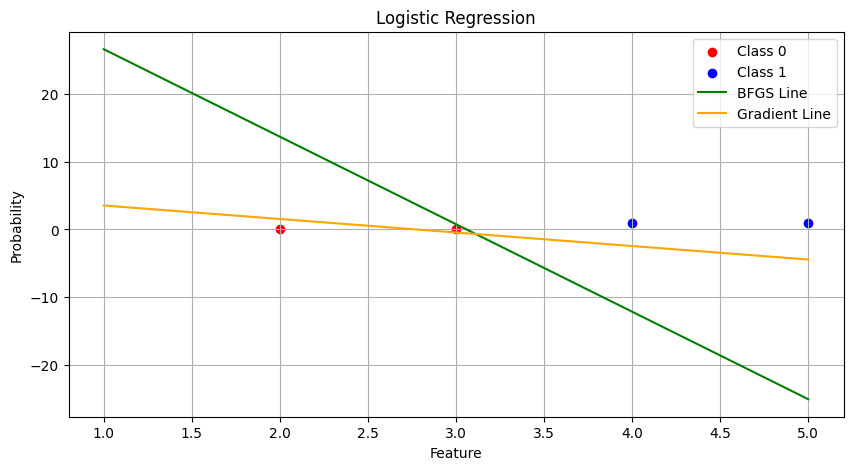

In [15]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:, 1], y[y == 0], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], y[y == 1], color='blue', label='Class 1')
x_values = np.linspace(1, 5, 100)
y_values_bfgs = -(w_bfgs[0] + w_bfgs[1] * x_values)
plt.plot(x_values, y_values_bfgs, label='BFGS Line', color='green')
y_values_gd = -(w_gd[0] + w_gd[1] * x_values)
plt.plot(x_values, y_values_gd, label='Gradient Line', color='orange')

plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.grid()
plt.show()

Пример использования BFGS и градиентного спуска в линейной регрессии на малых данных

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
def linear_loss(w, X, y):
    m = len(y)
    predictions = X.dot(w)
    return 1/(2*m) * np.sum((predictions - y) ** 2)

def linear_gradient(w, X, y):
    m = len(y)
    predictions = X.dot(w)
    return 1/m * X.T.dot(predictions - y)


In [18]:
def bfgs_linear_regression(X, y, x0, tol=1e-5, max_iter=1000):
    return bfgs(lambda w: linear_loss(w, X, y),
                lambda w: linear_gradient(w, X, y),
                x0, tol, max_iter)

def gradient_descent_linear_regression(X, y, x0, learning_rate=0.1, tol=1e-5, max_iter=1000):
    return gradient_descent(lambda w: linear_loss(w, X, y),
                            lambda w: linear_gradient(w, X, y),
                            x0, learning_rate, tol, max_iter)


In [19]:
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5]])
y = np.array([0, 0, 1, 1])
x0 = np.zeros(X.shape[1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w_bfgs = bfgs_linear_regression(X_train, y_train, x0)
print("Weights from BFGS:", w_bfgs)
w_gd = gradient_descent_linear_regression(X_train, y_train, x0)
print("Weights from Gradient Descent:", w_gd)

y_pred_bfgs = X_test.dot(w_bfgs)
y_pred_gd = X_test.dot(w_gd)

mse_bfgs = mean_squared_error(y_test, y_pred_bfgs)
mse_gd = mean_squared_error(y_test, y_pred_gd)

print("MSE BFGS:", mse_bfgs)
print("MSE Gradient Descent:", mse_gd)

BFGS: Converged in 3 iterations
BFGS: Time taken: 0.0139 seconds
BFGS: Current memory usage: 0.0041 MB; Peak: 0.0058 MB
Weights from BFGS: [-0.64285714  0.35714286]
GD: Converged in 900 iterations
GD: Time taken: 0.0630 seconds
GD: Current memory usage: 0.0048 MB; Peak: 0.0087 MB
Weights from Gradient Descent: [-0.64275807  0.35711848]
MSE BFGS: 0.18367346938775503
MSE Gradient Descent: 0.18369570652621203


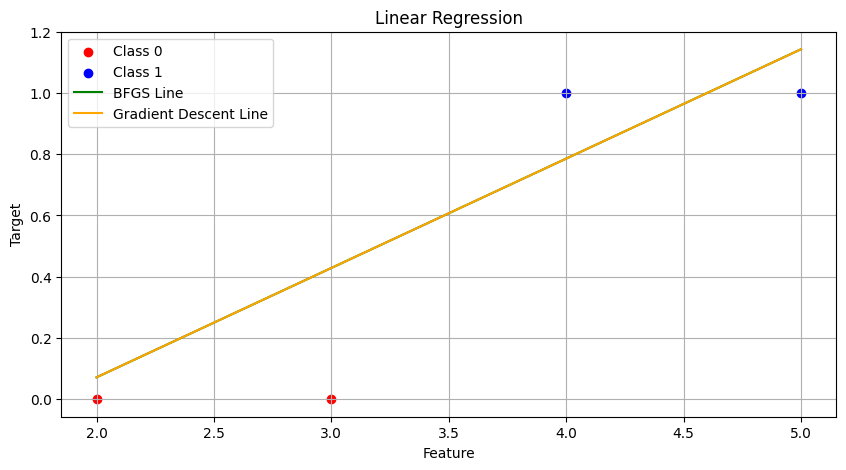

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:, 1], y[y == 0], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], y[y == 1], color='blue', label='Class 1')
x_values = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
y_values_bfgs = w_bfgs[0] + w_bfgs[1] * x_values
plt.plot(x_values, y_values_bfgs, label='BFGS Line', color='green')
y_values_gd = w_gd[0] + w_gd[1] * x_values
plt.plot(x_values, y_values_gd, label='Gradient Descent Line', color='orange')

plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression')
plt.legend()
plt.grid()
plt.show()


Пример использования BFGS и градиентного спуска в логической регрессии на увеличенном количестве данных

In [22]:
X = np.array([[1, 2], [1, 3], [1, 4], [1, 5], [2, 2], [2, 3], [2, 4], [2, 5],
              [-3, -2], [-3, -3], [-3, -4], [-3, -5], [-4, -2], [-4, -3]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
x0 = np.zeros(X.shape[1])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

w_bfgs = bfgs_logistic_regression(X_train, y_train, x0)
print("Weights from BFGS:", w_bfgs)
w_gd = gradient_descent_logistic_regression(X_train, y_train, x0)
print("Weights from Gradient Descent:", w_gd)

y_pred_bfgs = sigmoid(X_test.dot(w_bfgs)) >= 0.5
y_pred_gd = sigmoid(X_test.dot(w_gd)) >= 0.5

accuracy_bfgs = accuracy_score(y_test, y_pred_bfgs)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

print("Accuracy BFGS:", accuracy_bfgs)
print("Accuracy Gradient Descent:", accuracy_gd)

BFGS: Converged in 10 iterations
BFGS: Time taken: 0.0112 seconds
BFGS: Current memory usage: 0.0018 MB; Peak: 0.0056 MB
Weights from BFGS: [-2.30459403 -3.17769203]
GD: Reached maximum iterations (1000) without convergence
GD: Time taken: 0.1518 seconds
GD: Current memory usage: 0.0021 MB; Peak: 0.0030 MB
Weights from Gradient Descent: [-1.15166483 -1.59058538]
Accuracy BFGS: 1.0
Accuracy Gradient Descent: 1.0


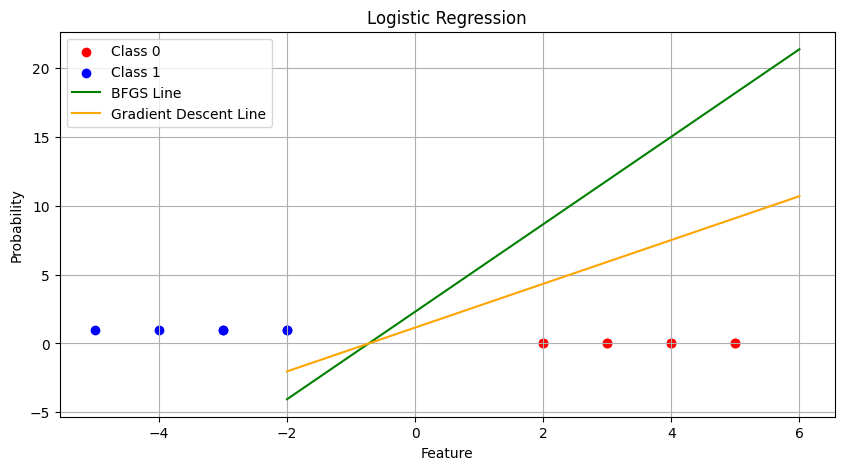

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(X[y == 0][:, 1], y[y == 0], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], y[y == 1], color='blue', label='Class 1')
x_values = np.linspace(-2, 6, 100)
y_values_bfgs = -(w_bfgs[0] + w_bfgs[1] * x_values)
plt.plot(x_values, y_values_bfgs, label='BFGS Line', color='green')
y_values_gd = -(w_gd[0] + w_gd[1] * x_values)
plt.plot(x_values, y_values_gd, label='Gradient Descent Line', color='orange')

plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Logistic Regression')
plt.legend()
plt.grid()
plt.show()